In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
import scipy

%matplotlib inline

# Описание используемых данных

- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств

# Данные

In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Размер кредитного лимита
(LIMIT_BAL)

В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [5]:
non_default = data[data.default == 0]
default = data[data.default == 1]

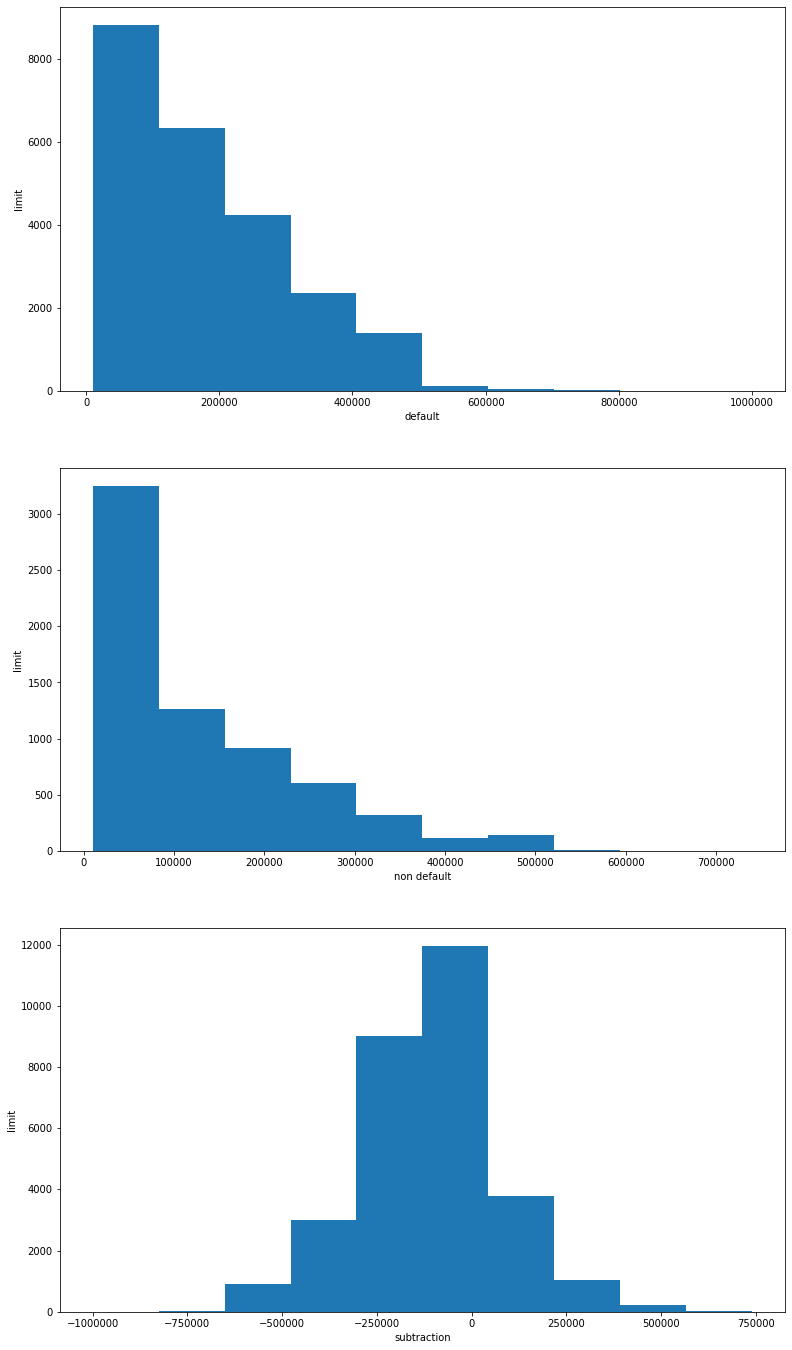

In [9]:
fig, ax = plt.subplots(3, figsize=(13, 24))
ax[0].hist(non_default.LIMIT_BAL)
ax[0].set_xlabel('default')
ax[0].set_ylabel('limit')
ax[1].hist(default.LIMIT_BAL)
ax[1].set_xlabel('non default')
ax[1].set_ylabel('limit')
ax[2].hist(default.LIMIT_BAL.subtract(non_default.LIMIT_BAL, fill_value=0))
ax[2].set_xlabel('subtraction')
ax[2].set_ylabel('limit')
plt.show()

Гипотезы:

$H_0\colon$ медианы кредитных лимитов равны в группах default и non default

$H_1\colon$ не равны

Проверку гипотезы будем делать при помощи доверительного интервала разности медиан на основе псевдовыборок, созданных при помощи бутстрепа (про распределение медиан нам ничего неизвестно).

In [11]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [12]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [13]:
def_limits = default.LIMIT_BAL.values
ndef_limits = non_default.LIMIT_BAL.values

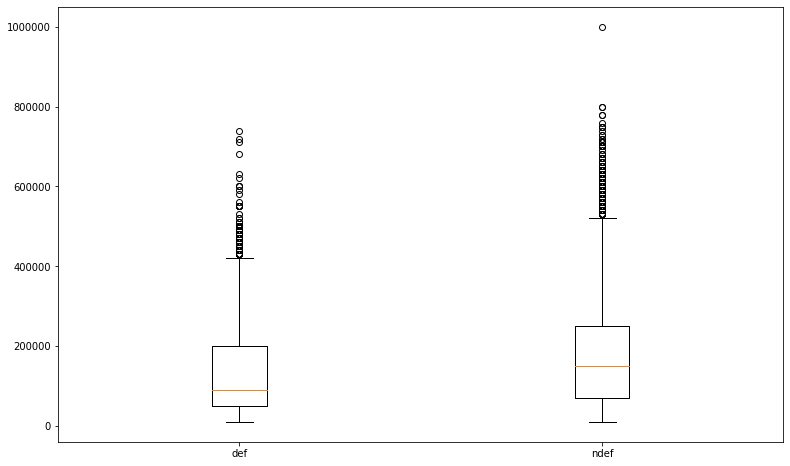

In [14]:
boxplots = {'def': def_limits, 'ndef': ndef_limits}
fig, ax = plt.subplots(figsize=(13, 8))
ax.boxplot(boxplots.values())
ax.set_xticklabels(boxplots.keys())
plt.show()

In [15]:
def_median_scores = list(map(np.median, get_bootstrap_samples(def_limits, 1000)))
ndef_median_scores = list(map(np.median, get_bootstrap_samples(ndef_limits, 1000)))

In [16]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(def_median_scores, ndef_median_scores)))

Точечная оценка разности медиан.

In [18]:
print("difference between medians:", np.median(def_limits) - np.median(ndef_limits))

difference between medians: -60000.0


95% доверительный интервал для разности медиан

In [20]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-65125. -60000.]


Ноль не попадает в 95% доверительный интервал => отвергаем $H_0$

Проверим гипотезу о равенстве распределений лимитов с помощью критерия Манна-Уитни (2 независимые выборки, распределения неизвестны, визуально по графикам понятно, что распределения сильно отличаются от нормальных => выбираем непараметрический критерий; возьмём средний по мощности критерий Манна-Уитни (между критерием знаков и перестановочным))

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [21]:
stats.mannwhitneyu(def_limits, ndef_limits)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

p-value < 0.05 Нулевая гипотеза уверенно отвергается. Медианы кредитных лимитов отличаются в группах вернувших и не вернувших кредит.

Практическая значимость существует. Точечная оценка разности медиан 60000. Такую сумму кредита можно оценить как существенную.

# Пол
(SEX)

Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

$H_0\colon$ гендерный состав группы людей вернувших и не вернувших кредит не отличается (p_default_female = p_nondefault_female)

$H_1\colon$ отличается

In [27]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [34]:
def_sex = default.SEX - 1 # вычитаем 1 чтобы sum() давало оценку количества одного из полов
ndef_sex = non_default.SEX - 1

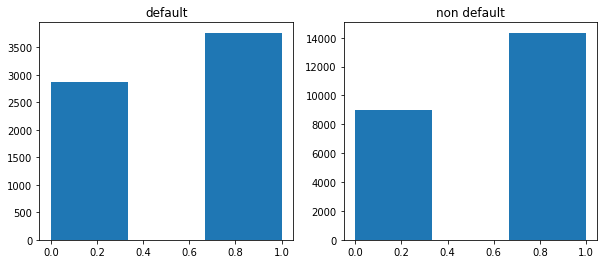

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(def_sex, bins=3)
axes[0].set_title('default')
axes[1].hist(ndef_sex, bins=3)
axes[1].set_title('non default')
plt.show()

Таблица сопряженности (при анализе долей удобнее использовать вместо графиков)

In [29]:
pd.crosstab(data.SEX, data.default)

default,0,1
SEX,,
1,9015,2873
2,14349,3763


Точечная оценка доли женщин для группы default

In [30]:
sum(def_sex) / len(def_sex)

0.5670584689572031

Точечная оценка доли женщин для группы non-default

In [31]:
sum(ndef_sex) / len(ndef_sex)

0.6141499743194658

Доля женщин больше в обеих группах

Интервальная оценка долей

In [36]:
conf_interval_def = proportion_confint(sum(def_sex), 
                                        len(def_sex),
                                        method = 'normal')
conf_interval_banner_ndef = proportion_confint(sum(ndef_sex), 
                                            len(ndef_sex),
                                            method = 'normal')

In [33]:
print('95%% confidence interval for females, default: [%f, %f]' % conf_interval_def)
print('95%% confidence interval for females, non-default [%f, %f]' % conf_interval_banner_ndef)

95% confidence interval for females, default: [0.555102, 0.578938]
95% confidence interval for females, non-default [0.607890, 0.620373]


Доверительные интервалы не пересекаются. Разница долей статистически значима.

Z-критерий для разности долей (независимые выборки, распределение Бернулли)

In [40]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

Построим доверительный интервал для разности долей мужчин и женщин в группах default и non-default

In [41]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_ind(def_sex, ndef_sex))

95% confidence interval for a difference between proportions: [-0.060548, -0.033635]


Ноль не входит в доверительный интервал.

In [42]:
print("p-value: %e" % proportions_diff_z_test(proportions_diff_z_stat_ind(def_sex, ndef_sex)))

p-value: 4.472867e-12


p-value < 0.05

Нулевую гипотезу отвергаем на уровне значимости 0.05. Гендерный состав вернувших и не вернувших кредит клиентов отличается.

# Образование 
(EDUCATION)

Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [45]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Таблица споряжённости "образование" на "возврат долга"

In [46]:
cont_table_edu = pd.crosstab(data.EDUCATION, data.default)
cont_table_edu

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Отсортируем уровни образования по доле не вернувших кредит клиентов.

In [144]:
(cont_table_edu[1] / cont_table_edu[0]).sort_values()

EDUCATION
0    0.000000
4    0.060345
5    0.068702
6    0.186047
1    0.238157
2    0.311215
3    0.336141
dtype: float64

По точечным оценкам долей получаем: 

- доктор(0), начальное образование(4) - долг возвращают чаще
- выпускник школы(3) - долг возвращают реже

Гипотезы:

$H_0\colon$ default и education независимы

$H_1\colon$ $H_0$ неверна

Проверим гипотезу (корреляция категориальных величин) при помощи критерия хи-квадрат.

Условия применимости критерия хи-квадрат:
- выборки достаточно большие: n >= 40: выполнено (n = 30000)
- ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек: выполнено (проверяем по переменной expected_edu)

In [52]:
_, p_edu, _, expected_edu = stats.chi2_contingency(cont_table_edu)

Ожидаемые частоты

In [148]:
expected_edu = pd.DataFrame(expected_edu)
expected_edu

,0,1
0,10.9032,3.0968
1,8243.5980,2341.4020
2,10926.5640,3103.4360
3,3829.3596,1087.6404
4,95.7924,27.2076
5,218.0640,61.9360
6,39.7188,11.2812


In [53]:
p_edu

1.2332626245415605e-32

p-value < 0.05 Отклоняем нулевую гипотезу на уровне значимости 0.05

Таблица сопряжённости разности между налюдаемыми и ожидаемыми частотами

In [150]:
delta_cont_table_edu = cont_table_edu - expected_edu
delta_cont_table_edu

default,0,1
EDUCATION,,
0,3.0968,-3.0968
1,305.4020,-305.4020
2,-226.5640,226.5640
3,-149.3596,149.3596
4,20.2076,-20.2076
5,43.9360,-43.9360
6,3.2812,-3.2812


Посчитаем долю отклонений наблюдаемого количества невернувших кредит людей в количестве людей с данных уровнем образования

Точечные оценки

In [151]:
delta_edu = delta_cont_table_edu[1] / (cont_table_edu[0] + cont_table_edu[1])
delta_edu

EDUCATION
0   -0.221200
1   -0.028852
2    0.016149
3    0.030376
4   -0.164289
5   -0.156914
6   -0.064337
dtype: float64

In [141]:
delta_edu.sort_values()

EDUCATION
0   -0.221200
4   -0.164289
5   -0.156914
6   -0.064337
1   -0.028852
2    0.016149
3    0.030376
dtype: float64

Критерий показывает, насколько сильно доля дефолтных клиентов отличается от ожидаемой доли (при независмости дефолта от уровня образования) и в какую сторону

0 = доктор: наилучший показатель того, что человек вернёт долг

3 = выпускник школы: наилучший показатель того, что человек долг не вернёт

Интервальные оценки доли невернувших кредит

In [63]:
confints_edu = []
for i in list(cont_table_edu.index):
    confints_edu.append(proportion_confint(cont_table_edu[1][i], data.EDUCATION.value_counts()[i], method = 'wilson'))

In [77]:
confints_edu

[(2.7755575615628914e-17, 0.21531080273763586),
 (0.1849512163529897, 0.19996732970999295),
 (0.23038098290588793, 0.24445988503282373),
 (0.2396447960904251, 0.2638953970972908),
 (0.02783797958312565, 0.11282154125946578),
 (0.041047153641855086, 0.09931803115612199),
 (0.08169223220048706, 0.2801044677298777)]

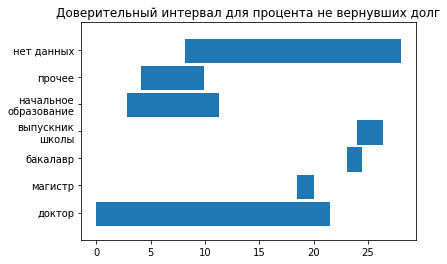

In [80]:
plt.figure()
for i in range(7):
    L = confints_edu[i][0] * 100
    R = confints_edu[i][1] * 100 - L
    plt.broken_barh([(L, R)], (i - 0.5, 0.9), facecolors='tab:blue')
plt.ylim(-1, 7)
plt.title('Доверительный интервал для процента не вернувших долг')
plt.yticks(range(7), ('доктор','магистр','бакалавр','выпускник\nшколы','начальное\nобразование','прочее','нет данных'))
plt.show()

- доктор: вероятность возврата кредита самая высокая; точность оценки низкая - слишком мало примеров в выборке
- начальное образование, прочее: вероятность возврата кредита высокая при хорошей точности
- выпускник школы, бакалавр: вероятность дефолта самая высокая

Коэфициент V Крамера

In [82]:
np.sqrt(stats.chi2_contingency(cont_table_edu)[0] / (cont_table_edu.sum().sum() * (min(4, 2) - 1)))

0.07376009713252163

Корреляция между уровнем образования и дефолтом статистически значима; уровень корреляции очень мал => считаем данную связь практически незначимой

# Семейное положение 
(MARRIAGE)

Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [83]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Посчитаем связь между default и marriage при помощи V Крамера

Таблица сопряжённости

In [84]:
cont_table_marr = pd.crosstab(data.MARRIAGE, data.default)
cont_table_marr

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


Гипотезы:

$H_0\colon$ default и marriage независимы

$H_1\colon$ $H_0$ неверна

Проверим гипотезу (корреляция категориальных величин) при помощи критерия хи-квадрат.

Условия применимости критерия хи-квадрат:
- выборки достаточно большие: n >= 40: выполнено (n = 30000)
- ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек: выполнено (проверяем по переменной expected_marr)

In [86]:
_, p_marr, _, expected_marr = stats.chi2_contingency(cont_table_marr)

In [90]:
expected_marr = pd.DataFrame(expected_marr)
expected_marr

,0,1
0,42.0552,11.9448
1,10637.6292,3021.3708
2,12432.7632,3531.2368
3,251.5524,71.4476


In [92]:
p_marr

8.825862457577375e-08

Связь признаков статистически значима (p < 0.05)

V Крамера

In [93]:
np.sqrt(stats.chi2_contingency(cont_table_marr)[0] / (cont_table_marr.sum().sum() * (min(4, 2) - 1)))

0.034478203662766466

Судя по значению корреялции V Крамера связь семейного положения с индикатором дефолта мала

# Возраст
(AGE)

Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

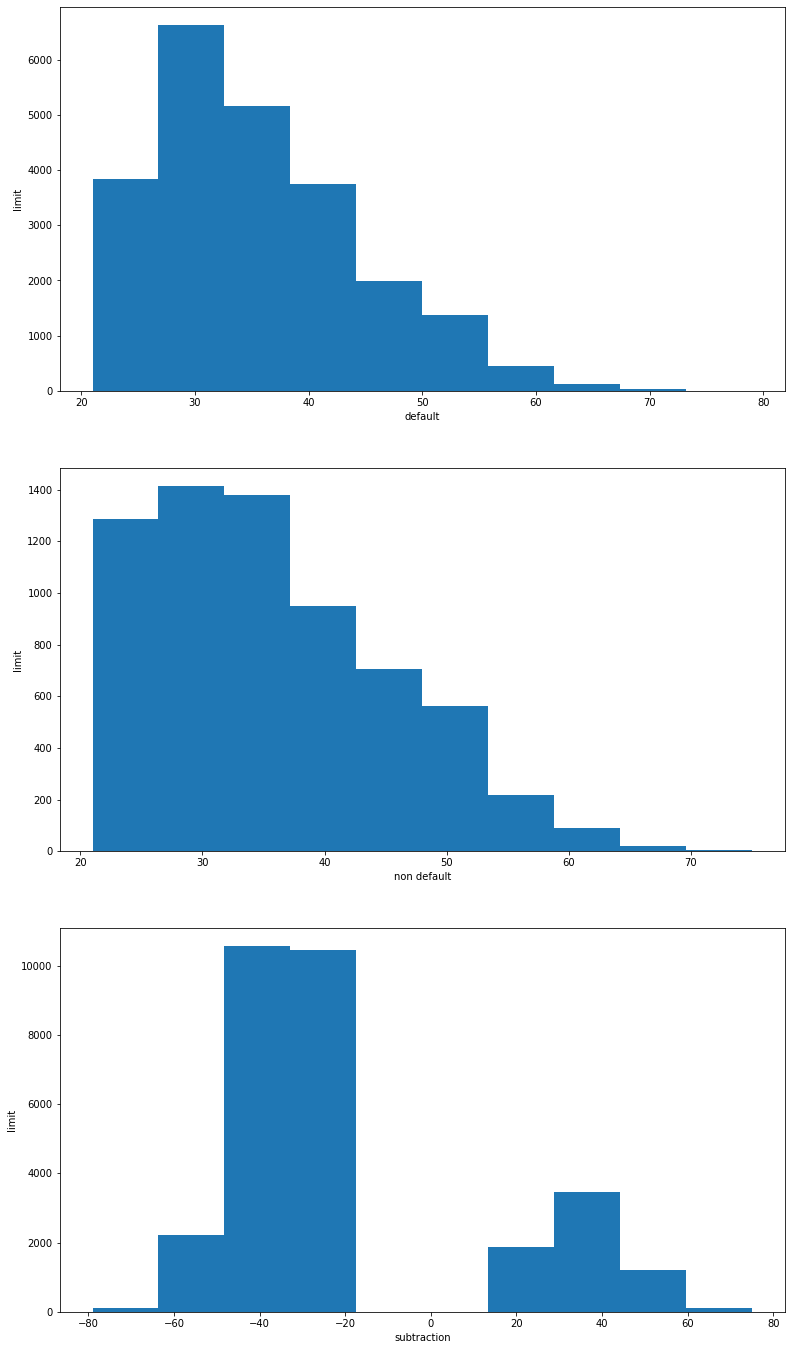

In [91]:
fig, ax = plt.subplots(3, figsize=(13, 24))
ax[0].hist(non_default.AGE)
ax[0].set_xlabel('default')
ax[0].set_ylabel('limit')
ax[1].hist(default.AGE)
ax[1].set_xlabel('non default')
ax[1].set_ylabel('limit')
ax[2].hist(default.AGE.subtract(non_default.AGE, fill_value=0))
ax[2].set_xlabel('subtraction')
ax[2].set_ylabel('limit')
plt.show()

In [94]:
def_age = default.AGE.values
ndef_age = non_default.AGE.values

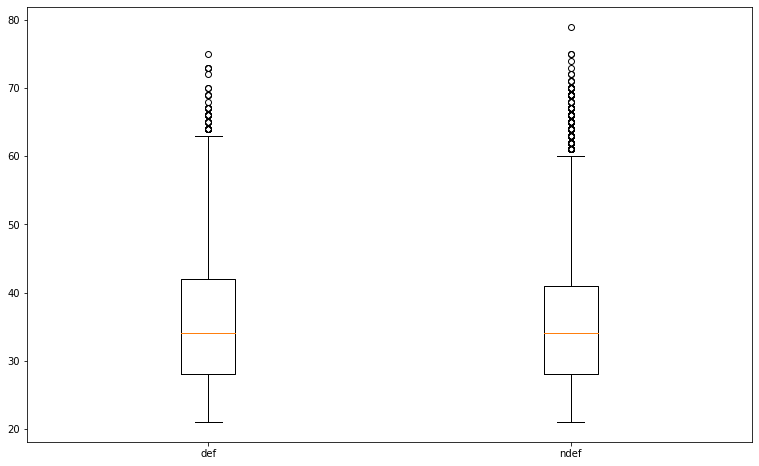

In [95]:
boxplots = {'def': def_age, 'ndef': ndef_age}
fig, ax = plt.subplots(figsize=(13, 8))
ax.boxplot(boxplots.values())
ax.set_xticklabels(boxplots.keys())
plt.show()

$H_0\colon$ медианы возрастов равны в группах default и non default

$H_1\colon$ не равны

Проверку гипотезы будем делать на основе псевдовыборок, созданных при помощи бутстрепа.

In [96]:
def_median_scores = list(map(np.median, get_bootstrap_samples(def_age, 1000)))
ndef_median_scores = list(map(np.median, get_bootstrap_samples(ndef_age, 1000)))

In [97]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(def_median_scores, ndef_median_scores)))

Точечная оценка для разности медиан

In [98]:
print("difference between medians:", np.median(def_median_scores) - np.median(ndef_median_scores))

difference between medians: 0.0


Доверительный интервал для разности медиан

In [99]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [0. 1.]


Ноль входит в доверительный интервал => нулевую гипотезу о равенстве медиан отвергнуть не можем

Проверим гипотезу о равенстве распределений возрастов с помощью критерия Манна-Уитни (2 независимые выборки, распределения неизвестны, визуально по графикам понятно, что распределения сильно отличаются от нормальных => выбираем непараметрический критерий; возьмём средний по мощности критерий Манна-Уитни (между критерием знаков и перестановочным))

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [100]:
stats.mannwhitneyu(def_age, ndef_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

p > 0.05 Отвергнуть нулевую гипотезу о равенстве распределений отвергнуть не можем

С практической точки зрения результат не значим - мы не отвергаем нулевую гипотезу, однако, мы и не принимаем её. Вероятно, на большей выборке возможно выявление закономерностей.